In [14]:
from nltk.tokenize import word_tokenize
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import wordnet
from collections import Counter

#### New DataFrame only with Plot and Genre

In [15]:
movies_nlp = pd.read_csv("Movie_Movies.csv")
gen_ = pd.read_csv("Movie_Genres.csv")
movies_nlp_= pd.merge(gen_, movies_nlp, on = "imdbID")
movies_nlp_ = movies_nlp_[["Genre", "Plot"]]
movies_nlp_["Genre"] = movies_nlp_["Genre"].str.strip()
movies_nlp_.dropna(inplace = True)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### All plots groupby "Genre" ( make each Genre a row)

In [16]:
movies_nlp_new = movies_nlp_.groupby(["Genre"], as_index=False, sort=False).agg(",".join)

#### tokenize, lower the text, lemmatization, check whether they are english words, clean numbers and punctuations...

In [17]:
lm=WordNetLemmatizer()
def tokenize_and_stem(text):
    tokens = nltk.tokenize.word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [lm.lemmatize(token) for token in tokens if wordnet.synsets(token) and token.isalpha()]

    return tokens

In [18]:
preplot = movies_nlp_new["Plot"].values

#### Counting each word, documentary term matrix

In [19]:
vectorizer2 = CountVectorizer(stop_words = "english", tokenizer = tokenize_and_stem)
X2 = vectorizer2.fit_transform(preplot)
data_dtm = pd.DataFrame(X2.toarray(), columns =vectorizer2.get_feature_names())
data_dtm.index= movies_nlp_new.Genre

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [20]:
data_dtm_ts = data_dtm.transpose()
data_dtm_ts.head()

Genre   Short  Drama  Documentary  Crime  Mystery  Horror  Thriller  Comedy  \
aa          3      4            0      0        0       0         0       3   
aaa         1      0            0      0        0       0         0       1   
aachen      2      0            2      0        0       0         0       0   
aalst       1      0            1      0        0       0         0       0   
aalto       0      0            1      0        0       0         0       0   

Genre   Romance  Animation    ...      Reality-TV  Adult  History  Fantasy  \
aa            1          0    ...               0      0        0        0   
aaa           0          1    ...               0      0        0        0   
aachen        0          0    ...               0      0        0        0   
aalst         0          0    ...               0      0        0        0   
aalto         0          0    ...               0      0        0        0   

Genre   Musical  Sport  News  Game-Show  Talk-Show  Film-Noir  
aa            0      0     0          0          0          0  
aaa           0      0     0          0          0          0  
aachen        0      0     0          0          0          0  
aalst         0      0     0          0          0          0  
aalto         0      0     0          0          0          0  

[5 rows x 28 columns]

#### check the most frequent 30 words for each Genre

In [21]:
top_dict = {}
for g in data_dtm_ts.columns:
    top = data_dtm_ts[g].sort_values(ascending = False).head(30)
    top_dict[g] = list(zip(top.index, top.values))

#### Check the common words among all genres.

In [22]:
words = []
for genre in data_dtm_ts.columns:
    top = [word for (word, count) in top_dict[genre]]
    for t in top:
        words.append(t)

In [23]:
Counter(words).most_common()

[('life', 27),
 ('new', 26),
 ('man', 25),
 ('young', 25),
 ('ha', 25),
 ('film', 25),
 ('woman', 25),
 ('year', 25),
 ('story', 24),
 ('world', 23),
 ('wa', 23),
 ('girl', 18),
 ('time', 18),
 ('friend', 17),
 ('family', 17),
 ('love', 14),
 ('day', 14),
 ('old', 12),
 ('come', 12),
 ('documentary', 10),
 ('home', 9),
 ('make', 9),
 ('boy', 8),
 ('father', 8),
 ('people', 8),
 ('wife', 8),
 ('set', 8),
 ('short', 7),
 ('school', 7),
 ('city', 7),
 ('war', 7),
 ('try', 7),
 ('group', 7),
 ('help', 7),
 ('meet', 6),
 ('look', 6),
 ('music', 6),
 ('town', 6),
 ('night', 5),
 ('way', 5),
 ('child', 5),
 ('death', 5),
 ('american', 5),
 ('journey', 5),
 ('mysterious', 5),
 ('mother', 4),
 ('follows', 4),
 ('murder', 4),
 ('police', 4),
 ('killer', 4),
 ('daughter', 3),
 ('interview', 3),
 ('work', 3),
 ('explores', 3),
 ('detective', 3),
 ('gang', 3),
 ('brother', 3),
 ('house', 3),
 ('begin', 3),
 ('fall', 3),
 ('team', 3),
 ('live', 3),
 ('special', 3),
 ('series', 3),
 ('tv', 3),
 ('sta

In [24]:
commonDescr = [word for (word, count) in Counter(words).most_common() if count > 4]

In [70]:
from wordcloud import WordCloud
import  matplotlib.pyplot as plt
wc_CommDesc = WordCloud(background_color="white", colormap="Dark2", mask = mask)

In [55]:
commonDescr.remove("wa")

In [68]:
from PIL import Image
import numpy as np
import urllib
import requests

In [78]:
mask = np.array(Image.open(requests.get("https://sitejerk.com/images/movie-camera-transparent-3.png", stream=True).raw))

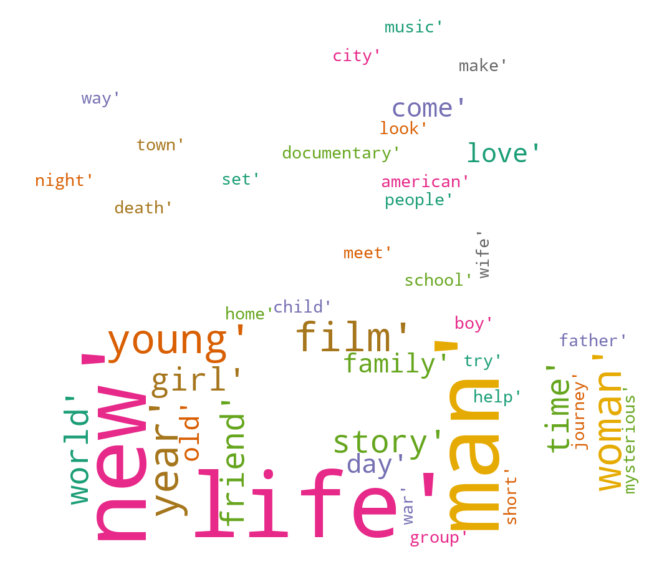

In [79]:
wc_CommDesc.generate(str(commonDescr))
plt.imshow(wc_CommDesc, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Making the most common words as stop words 

In [33]:
additionalStopWords = [word for (word, count) in Counter(words).most_common() if count > 15]

In [34]:
stopWordsAll = text.ENGLISH_STOP_WORDS.union(additionalStopWords)

In [35]:
cv2 = CountVectorizer(stop_words=stopWordsAll, tokenizer = tokenize_and_stem)
data_cv2 = cv2.fit_transform(preplot)
data_clean = pd.DataFrame(data_cv2.toarray(), columns =cv2.get_feature_names())
data_clean.index = movies_nlp_new.Genre

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [36]:
data_clean = data_clean.transpose()

In [37]:
top_dict2 = {}
for g in data_clean.columns:
    top = data_clean[g].sort_values(ascending = False).head(30)
    top_dict2[g] = list(zip(top.index, top.values))

In [38]:
new_dict = {}
for k in top_dict2.keys():
    new_dict[k] = [word for (word, count) in top_dict2[k]]


In [39]:
freqWordls = list(new_dict.items())

#### Remove the genre word from the plot

In [40]:
for k in new_dict.keys():
    if str(k).lower() in str(new_dict[k]):
                            new_dict[k].remove(str(k).lower())
                             
    

In [42]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", colormap="Dark2")
import matplotlib.pyplot as plt

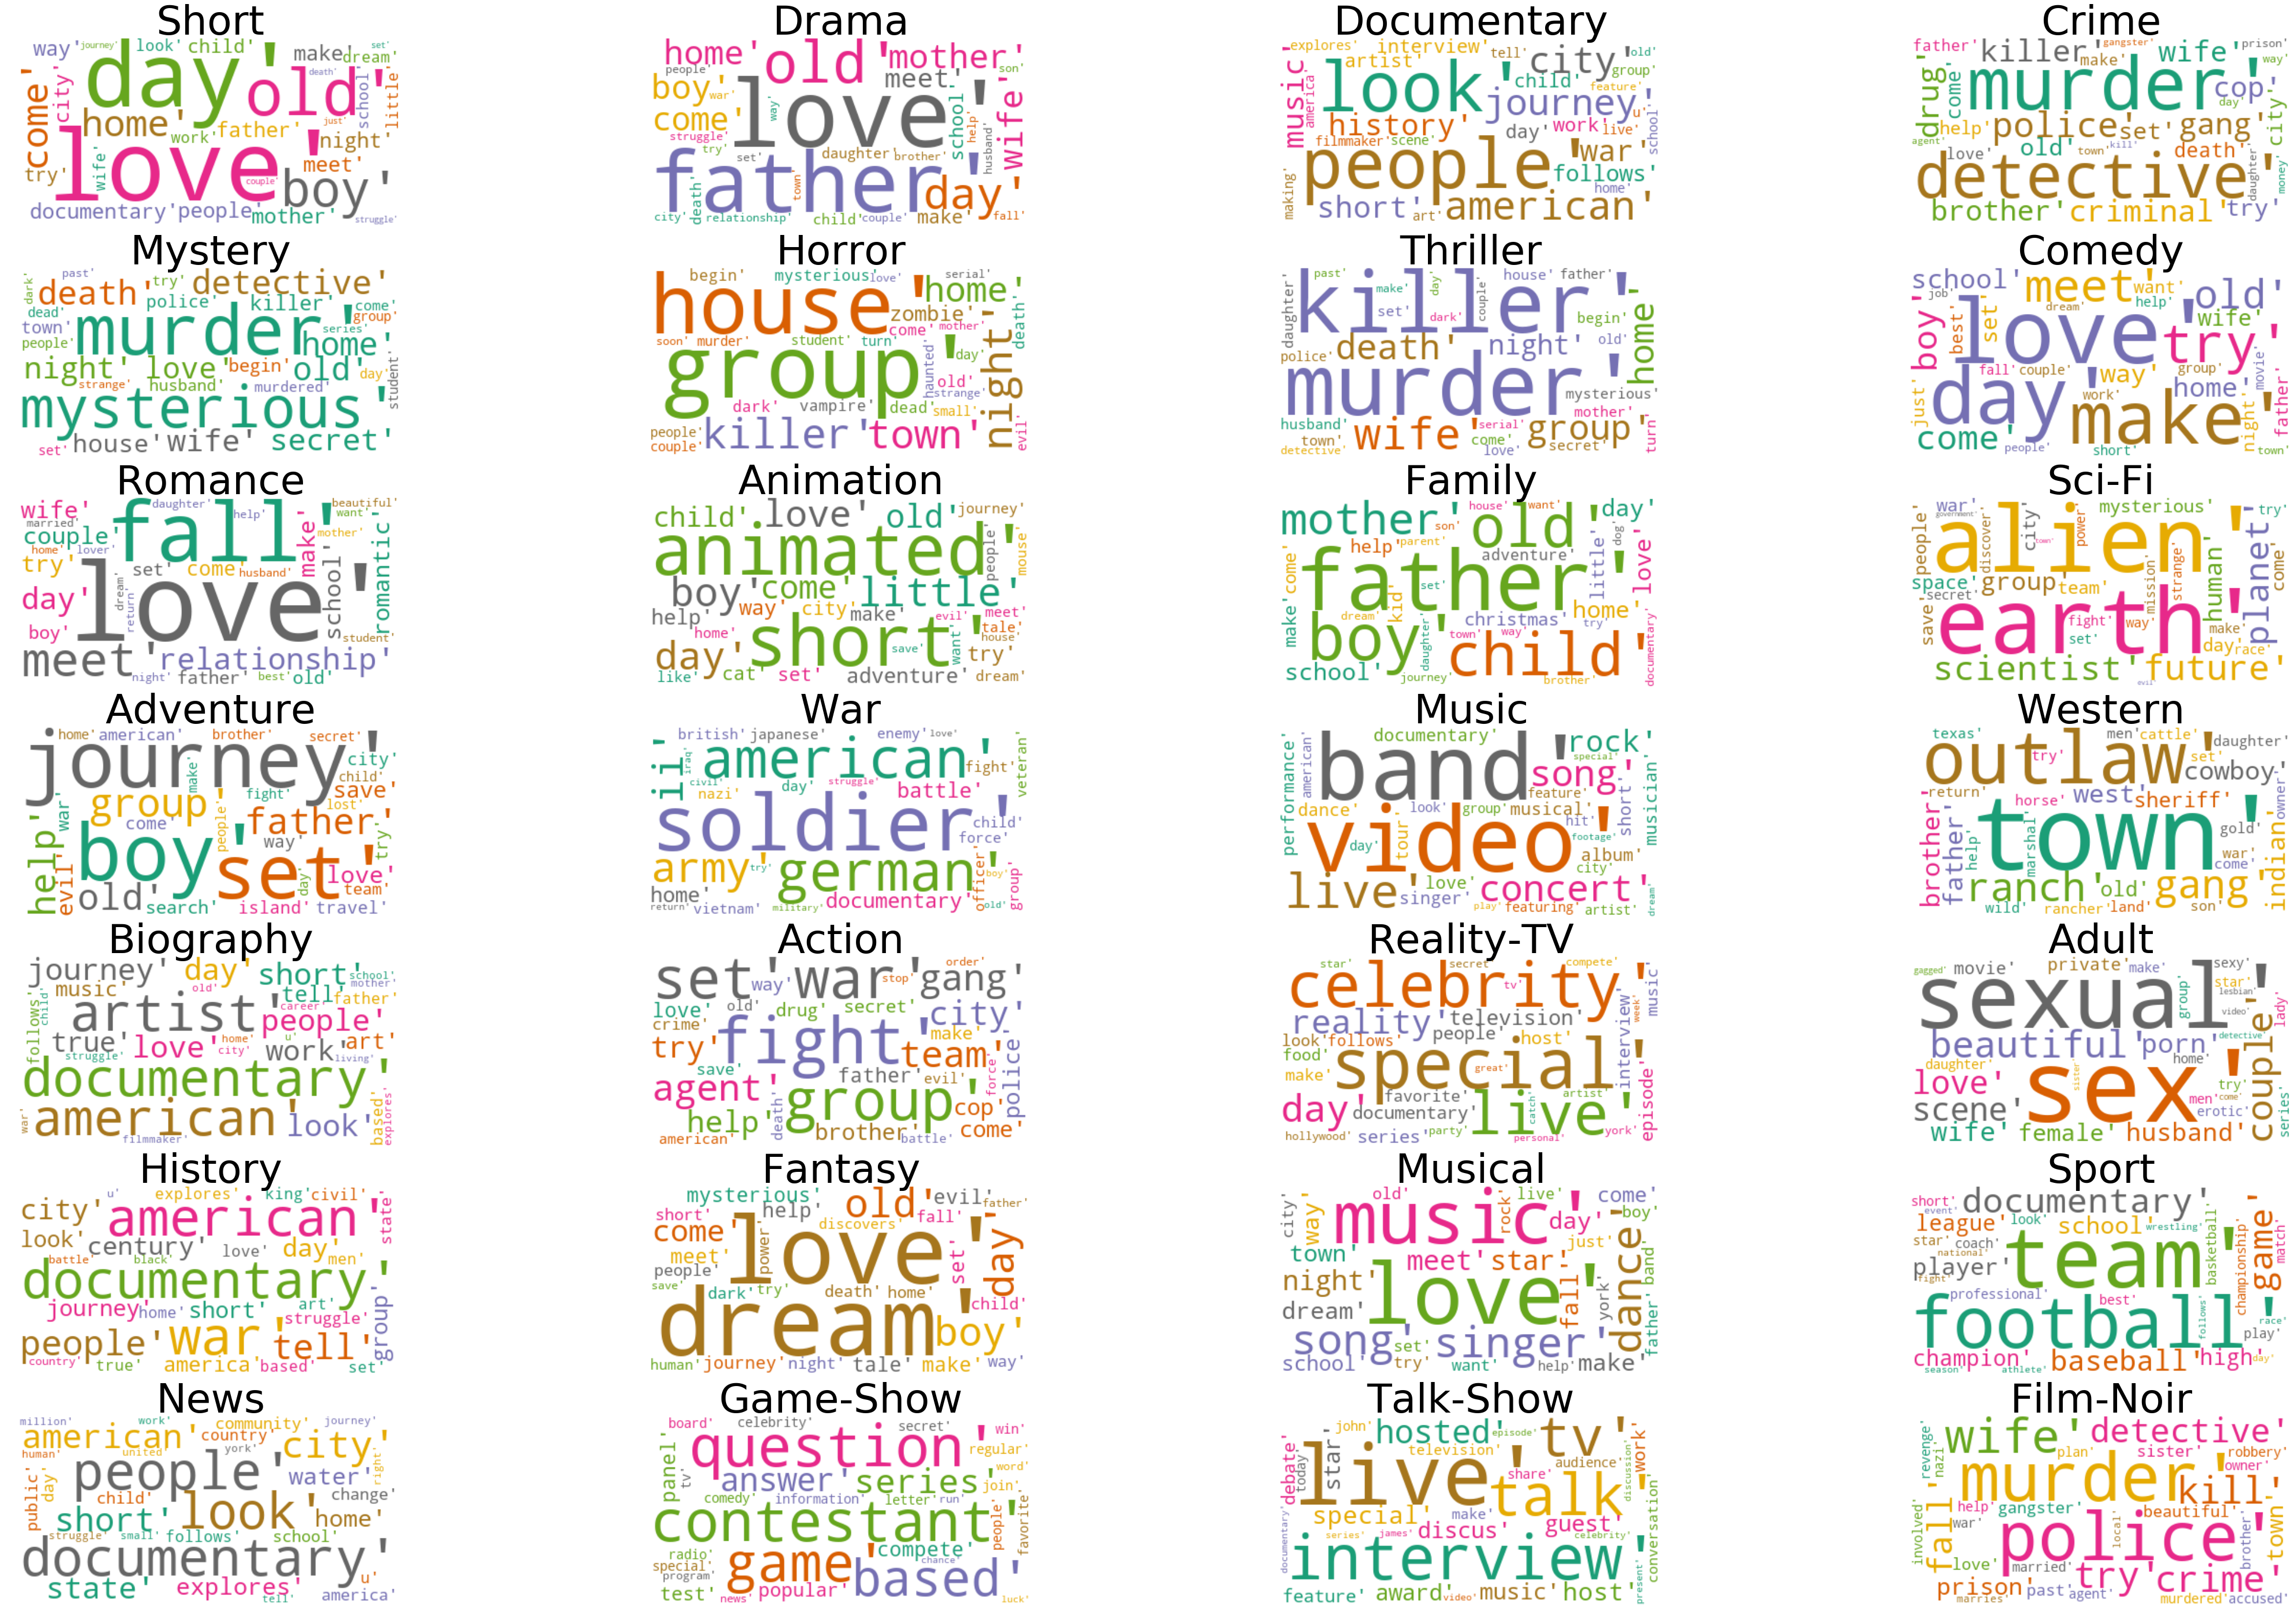

In [50]:
fig, ax = plt.subplots(figsize=(75,50))
for t in range(len(freqWordls)):
        i = t+1
        wc.generate(str(freqWordls[t][1]))
        plt.subplot(7, 4, i).set_title(freqWordls[t][0], fontsize= 70)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
plt.show()

In [59]:
from textblob import TextBlob

In [61]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

movies_nlp_new['polarity'] = movies_nlp_new["Plot"].apply(pol)
movies_nlp_new['subjectivity'] = movies_nlp_new["Plot"].apply(sub)
movies_nlp_new

Genre                                               Plot  polarity  \
0         Short  Rachel constantly hears her baby cry from the ...  0.064367   
1         Drama  Rachel constantly hears her baby cry from the ...  0.054761   
2   Documentary  A Gift introduces Samuel Green, Washington Sta...  0.110444   
3         Crime  When heavily armed campus police broke into th...  0.003440   
4       Mystery  SUGAR PINE FALLS is about growing up fast. Mon...  0.011229   
5        Horror  Tom and Brenda have the perfect life but when ... -0.030183   
6      Thriller  Tom and Brenda have the perfect life but when ... -0.014048   
7        Comedy  Insurance sales Chen Wen is single for long, a...  0.079513   
8       Romance  Insurance sales Chen Wen is single for long, a...  0.120906   
9     Animation  It's a high-flying adventure when Louie, a mut...  0.067812   
10       Family  It's a high-flying adventure when Louie, a mut...  0.092255   
11       Sci-Fi  What would happen if you met a carbon copy of ...  0.002021   
12    Adventure  The son of a deceased Coast Guard hero is rais...  0.054219   
13          War  A girl saves a wounded soldier left by a rival...  0.033253   
14        Music  Rock A Bye Dead Man is a rock opera about a de...  0.133304   
15      Western  Arizona Ranger Larry Grant is posing as an out...  0.019396   
16    Biography  Documentary about the life of the Mexican scul...  0.112131   
17       Action  Torn between love for his family and dedicatio...  0.008146   
18   Reality-TV  52 beauty contestants compete for the title of...  0.134660   
19        Adult  This time out it's Robin Hood who's out to ste...  0.114137   
20      History  I Have Seen The Future is an experimental docu...  0.086730   
21      Fantasy  Kayoz is the stage name of one of the Flying A...  0.057759   
22      Musical  Kayoz is the stage name of one of the Flying A...  0.123585   
23        Sport  From the Other Side is the first film that sho...  0.125343   
24         News  Get between the sheets of Bali's male sex trad...  0.093408   
25    Game-Show  A compilation of all the best moments from the...  0.069911   
26    Talk-Show  The INShow hour long video interview with mult...  0.186726   
27    Film-Noir  A fast-moving automobile fails to make a sharp...  0.015877   

    subjectivity  
0       0.461550  
1       0.456031  
2       0.406685  
3       0.459891  
4       0.477022  
5       0.492638  
6       0.473562  
7       0.479974  
8       0.478025  
9       0.490312  
10      0.460426  
11      0.470068  
12      0.468405  
13      0.334492  
14      0.438047  
15      0.419891  
16      0.424508  
17      0.458591  
18      0.495320  
19      0.518725  
20      0.383055  
21      0.493680  
22      0.459122  
23      0.436955  
24      0.397372  
25      0.511700  
26      0.475335  
27      0.441996

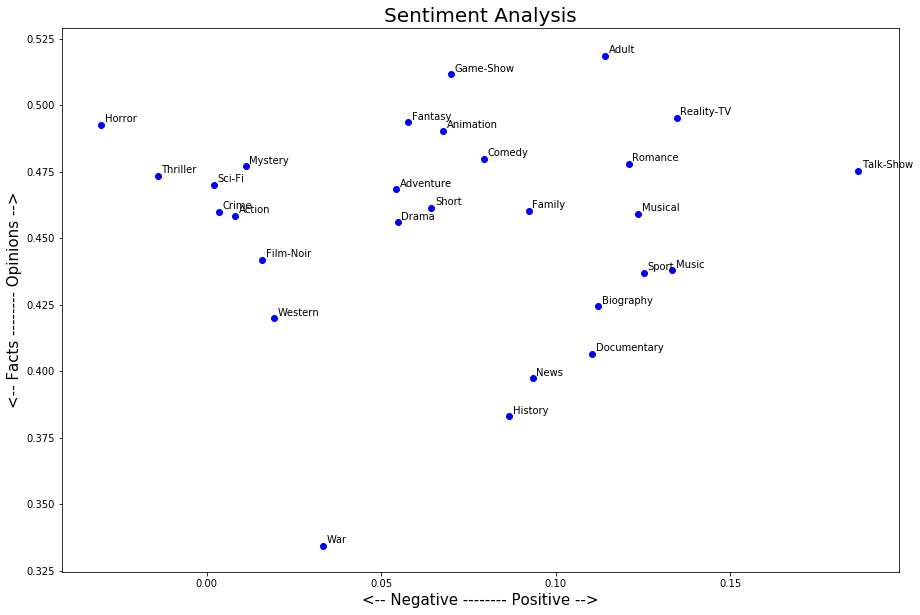

In [67]:
#plt.rcParams['figure.figsize'] = [15, 10]

for index, genre in enumerate(movies_nlp_new.index):
    x = movies_nlp_new.polarity.loc[genre]
    y = movies_nlp_new.subjectivity.loc[genre]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, movies_nlp_new["Genre"][index], fontsize=10)
    
plt.title("Sentiment Analysis", fontsize=20)
plt.xlabel("<-- Negative -------- Positive -->", fontsize=15)
plt.ylabel("<-- Facts -------- Opinions -->", fontsize=15)

plt.show()
